# World Happines Analysis

## Content
### 01. Importing libraries and data
### 02. Data cleaning
### 03. Checking extreme values
### 04. Data prep for regression analysis
### 05. Regression analysis 
### 06. Performance improvement after removing outliers

## 01. Importing libraries and data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [6]:
# Create Path
path="C:/Users/Oksana Stepanova/OneDrive/Документи/World Happiness/02 Data/Prepared Data/"

In [7]:
# Import data
wh_merged=pd.read_csv(os.path.join(path, 'wh_merged.csv'))

In [8]:
wh_merged.head()

,Unnamed: 0,country,year,happiness_rank,happiness_score,economy_GDP_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual,File_Name
0,0,Switzerland,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,wh_2015_wrangled.csv
1,1,Iceland,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,wh_2015_wrangled.csv
2,2,Denmark,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,wh_2015_wrangled.csv
3,3,Norway,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,wh_2015_wrangled.csv
4,4,Canada,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,wh_2015_wrangled.csv


## 02. Data cleaning

In [10]:
# Drop irrelevant columns
wh_merged.drop(columns=['Unnamed: 0', 'File_Name'])

,country,year,happiness_rank,happiness_score,economy_GDP_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual
0,Switzerland,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
1362,Congo (Kinshasa),2023,133,3.207,0.53100,0.78400,0.10500,0.37500,0.06800,0.18300,0.00000
1363,Zimbabwe,2023,134,3.204,0.75800,0.88100,0.06900,0.36300,0.11700,0.11200,0.00000
1364,Sierra Leone,2023,135,3.138,0.67000,0.54000,0.09200,0.37100,0.05100,0.19300,0.00000
1365,Lebanon,2023,136,2.392,1.41700,0.47600,0.39800,0.12300,0.02700,0.06100,0.00000


In [12]:
wh_merged=wh_merged.drop(columns=['Unnamed: 0', 'File_Name'])

In [13]:
wh_merged.shape

(1367, 11)

In [14]:
wh_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      1367 non-null   object 
 1   year                         1367 non-null   int64  
 2   happiness_rank               1367 non-null   int64  
 3   happiness_score              1367 non-null   float64
 4   economy_GDP_per_capita       1367 non-null   float64
 5   family                       1367 non-null   float64
 6   health_life_expectancy       1367 non-null   float64
 7   freedom                      1367 non-null   float64
 8   trust_government_corruption  1367 non-null   float64
 9   generosity                   1367 non-null   float64
 10  dystopia_residual            1367 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 117.6+ KB


## 03. Checking extreme values

C:\Users\Oksana Stepanova\AppData\Local\Temp\ipykernel_21536\3630375891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wh_merged['health_life_expectancy'], bins=25)
C:\Users\Oksana Stepanova\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='health_life_expectancy', ylabel='Density'>

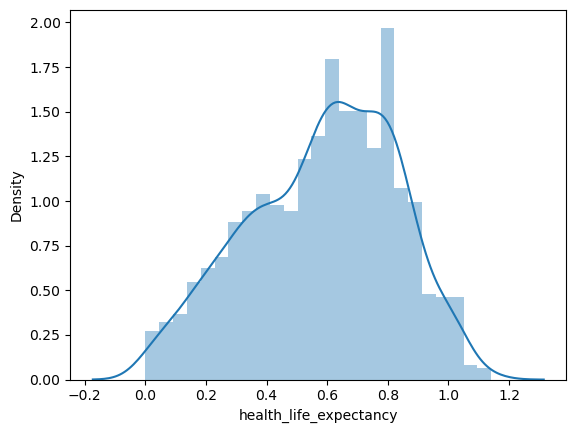

In [17]:
# Show extreme values
sns.distplot(wh_merged['health_life_expectancy'], bins=25)

In [19]:
# Check for the mean
wh_merged['health_life_expectancy'].mean()

0.584039930355694

In [20]:
# Check for the median
wh_merged['health_life_expectancy'].median()

0.612448037

In [21]:
# Check for the max value
wh_merged['health_life_expectancy'].max()

1.141

In [22]:
# Check for the min value
wh_merged['health_life_expectancy'].min()

0.0

## Hypothesis

#### If the life expectancy factor is higher, then the country is more likely to have a higher happiness score.

## 04. Data prep for regression analysis

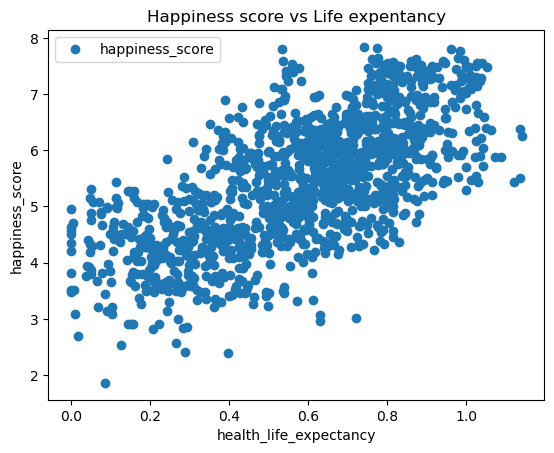

In [27]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

wh_merged.plot(x = 'health_life_expectancy', y='happiness_score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Happiness score vs Life expentancy')  
plt.xlabel('health_life_expectancy')  
plt.ylabel('happiness_score')  
plt.show()

In [28]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = wh_merged['health_life_expectancy'].values.reshape(-1,1)
y = wh_merged['happiness_score'].values.reshape(-1,1)

In [29]:
X

array([[0.94143],
       [0.94784],
       [0.87464],
       ...,
       [0.092  ],
       [0.398  ],
       [0.087  ]])

In [30]:
y

array([[7.587],
       [7.561],
       [7.527],
       ...,
       [3.138],
       [2.392],
       [1.859]])

In [31]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 05. Regression analysis

In [33]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [34]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [35]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

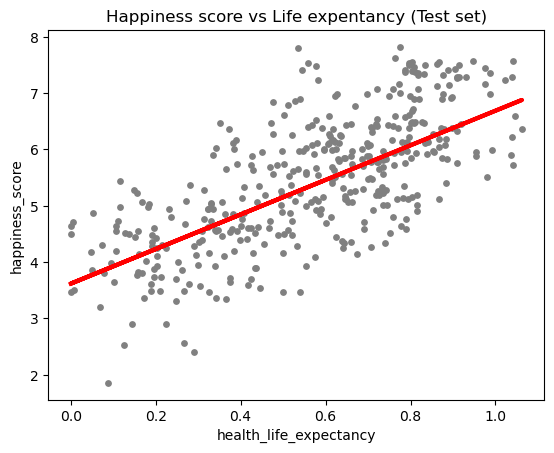

In [36]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Happiness score vs Life expentancy (Test set)')
plot_test.xlabel('health_life_expectancy')
plot_test.ylabel('happiness_score')
plot_test.show()

In [37]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [38]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.06772431]]
Mean squared error:  0.6693413154209316
R2 score:  0.4888875849463975


#### Interpretation:
#### The slope is positive. This means that the relationship between X and Y variables is positive. This aligns with the hypothesis: if the life expectancy score is higher, there are more probability that the country has a higher happiness score. 
#### The MSE is at 0.6693. The data points are not very close to the regression line. This means the model may not be accurate for a small dataframe of 1367 observations. 
#### R2 score of 0.49 represents a moderate fit.

In [40]:
y_predicted

array([[5.42859222],
       [4.00516814],
       [5.59118161],
       [6.10839993],
       [4.94916826],
       [4.68451569],
       [6.17574299],
       [4.90094364],
       [4.42121291],
       [6.37038358],
       [4.43771727],
       [6.07588205],
       [4.58190031],
       [4.54922904],
       [4.5383693 ],
       [4.95432204],
       [5.46430053],
       [5.77730044],
       [5.64814925],
       [6.12496564],
       [6.03806049],
       [3.61863487],
       [5.08193937],
       [5.67094244],
       [5.63412975],
       [4.24138291],
       [5.87608008],
       [5.49301443],
       [5.2231774 ],
       [5.96164   ],
       [5.77524507],
       [4.93709187],
       [6.03293391],
       [5.21691924],
       [4.20150249],
       [5.75990644],
       [5.61930954],
       [5.76604189],
       [5.21998697],
       [4.54346172],
       [6.62326146],
       [4.46937965],
       [5.53185182],
       [6.33801909],
       [6.10562709],
       [3.94381365],
       [6.29789326],
       [6.059

In [41]:
# Create a dataframe comparing the actual and predicted values of y.
compare_data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
compare_data.head(30)

,Actual,Predicted
0,4.9480,5.428592
1,2.5230,4.005168
2,4.3400,5.591182
3,6.4850,6.108400
4,3.8960,4.949168
5,4.5740,4.684516
6,7.5040,6.175743
7,4.6030,4.900944
8,3.8560,4.421213
9,6.3770,6.370384


#### Compare how the regression fits the training set

In [43]:
# Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [44]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [45]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.06772431]]
Mean squared error:  0.66804263835645
R2 score:  0.45352087981503664


#### The values are identical to the model. Positive relationship, MSE 0.6680 and a moderate R2 (0.45). The model is not overfitted. This indicates that the life expectancy is correlated positively with the happiness score. However, other variances in the data may determine the happiness score.

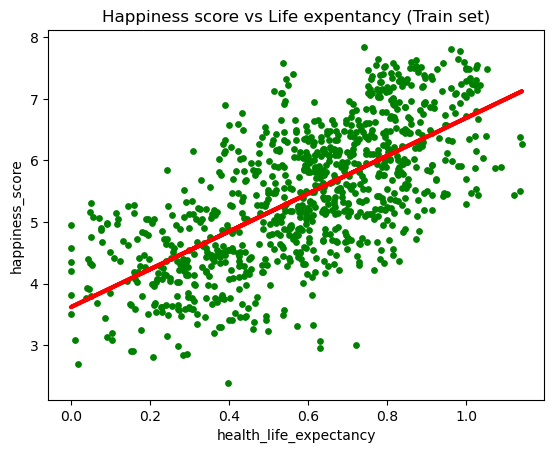

In [47]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Happiness score vs Life expentancy (Train set)')
plot_test.xlabel('health_life_expectancy')
plot_test.ylabel('happiness_score')
plot_test.show()

## 06. Performance improvement after removing outliers

In [50]:
# Clean the extreme values from the 'health_life_expectancy' variable observed during the consistency checks.
df_test=wh_merged[wh_merged['health_life_expectancy']<=1.102504] # Q2 (mean)+stdev*2 

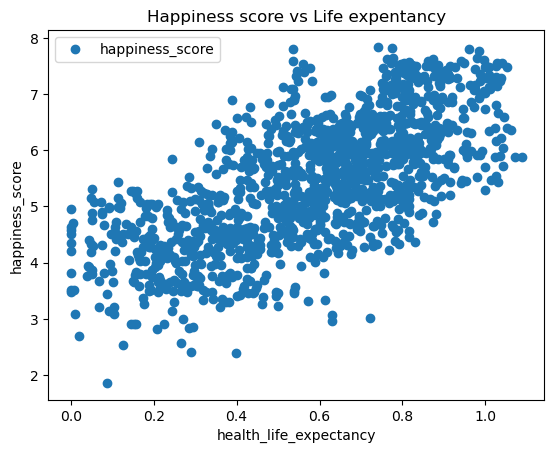

In [51]:
# See how the scatterplot looks without outliers.
df_test.plot(x = 'health_life_expectancy', y='happiness_score', style='o')  
plt.title('Happiness score vs Life expentancy')  
plt.xlabel('health_life_expectancy')  
plt.ylabel('happiness_score')  
plt.show()

In [52]:
# Reshape again.
X_2 = df_test['health_life_expectancy'].values.reshape(-1,1)
y_2 = df_test['happiness_score'].values.reshape(-1,1)

In [53]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [54]:
# Run and fit the regression.
regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [55]:
# Predict.
y_predicted_2 = regression.predict(X_test_2)

In [56]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [57]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.11780527]]
Mean squared error:  0.6805499590171797
R2 score:  0.4740312908066432


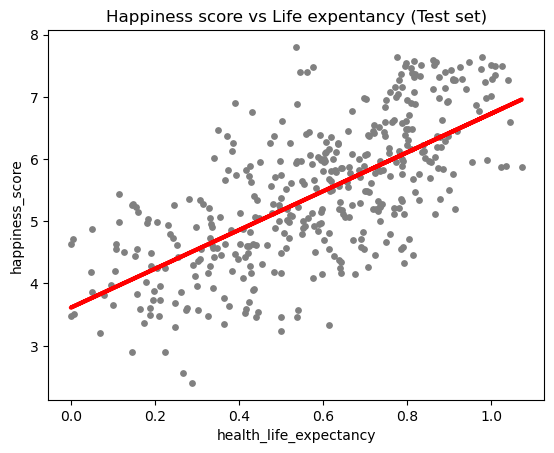

In [58]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Happiness score vs Life expentancy (Test set)')
plot_test.xlabel('health_life_expectancy')
plot_test.ylabel('happiness_score')
plot_test.show()

In [59]:
data_compare_2 = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data_compare_2.head(30)

,Actual,Predicted
0,5.199,5.853366
1,7.157,6.068494
2,5.046,5.005323
3,6.485,6.142074
4,3.896,4.963918
5,4.574,4.694945
6,7.504,6.210517
7,4.603,4.914906
8,3.856,4.427344
9,6.372,5.117564


#### After removing outliers, the summary statistics shows the same positive correlation between selected variables (Slope=3.12); MSE=0.68 means that the datapoints still scattered far from the regression line; r2 coefficient (0.47) is slightly improved, but indicates a moderate fit. Thus, this model is considered inaccurate for this data set.